# Null Hypothes : Apperent temprature and humidity compare monthly across 10 yrs of data indicating an increase in global warming

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
df = pd.read_csv("weatherHistory.csv")

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [22]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.set_index('Formatted Date', inplace = True)
df1 = df[['Apparent Temperature (C)', 'Humidity']]
df2 = df1.resample('M').mean()

In [23]:
df2.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


In [25]:
reg = linear_model.LinearRegression()

In [27]:
temp = []
hum = []
for i in range(1,13):
    X =pd.DataFrame(df2[df2.index.month==i]['Apparent Temperature (C)'].index.year)
    y1 = np.array(df2[df2.index.month==i]['Humidity'])
    y= np.array(df2[df2.index.month==i]['Apparent Temperature (C)'])
    reg.fit(X,y)
    temp.append(reg.coef_[0])
    reg.fit(X,y1)
    hum.append(reg.coef_[0])

<AxesSubplot:>

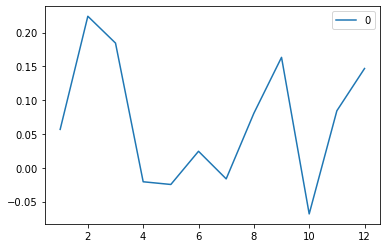

In [30]:
Temp = pd.DataFrame(temp, range(1,13))
Temp.plot()

<AxesSubplot:>

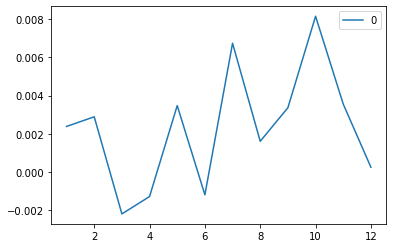

In [31]:
Humid = pd.DataFrame(hum, range(1,13))
Humid.plot()

In [33]:
trend = pd.merge(Temp, Humid, right_index =True, left_index =True)
trend.columns = ['Apparent Temprature', 'Humidity']
trend

,Apparent Temprature,Humidity
1,0.056791,0.002387
2,0.224199,0.002891
3,0.184491,-0.002180
4,-0.020688,-0.001273
5,-0.024692,0.003475
6,0.024435,-0.001182
7,-0.016417,0.006731
8,0.080612,0.001612
9,0.163377,0.003366
10,-0.068251,0.008141


In [34]:
sum(temp)/len(temp)

0.06958959301768973

In [35]:
sum(hum)/len(hum)

0.0023149776008545824

# Conclusion : Apparent Temprature and Humidity across last 10yrs. of data indicating increase in global warming.